## This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df= pd.read_csv("churn_modelling.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Variables


### Row Numbers= from 1 to 10000

### CustomerId= Unique Ids for bank customer identification

### Surname= Customer's last name

### CreditScore= Credit score of the customer

### Geography= The country from which the customer belongs

### Age= Age of the customer

### Tenure= Number of years for which the customer has been with the bank

### Balance= Bank balance of the customer
### NumOfProducts=Number of bank products the customer is utilising
### Existed= where the customer closed the bank account or not


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploratory data analysis

<AxesSubplot:xlabel='Exited', ylabel='count'>

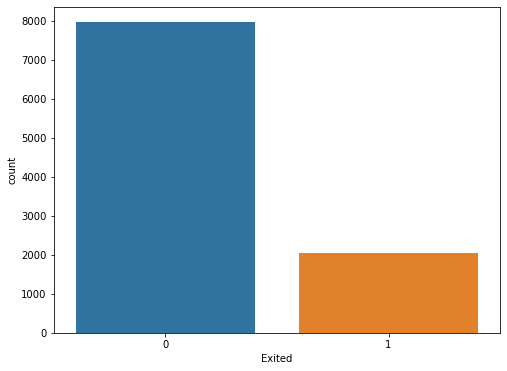

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

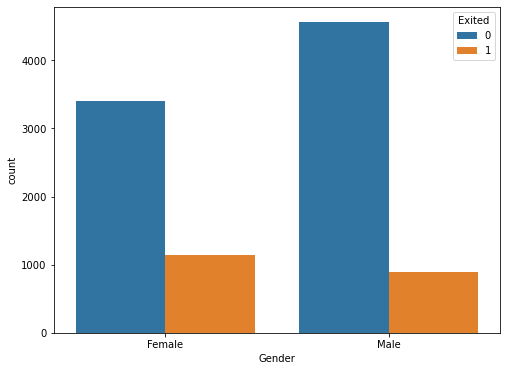

In [6]:
plt.figure(figsize=(8,6))

sns.countplot(x="Gender", hue="Exited", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

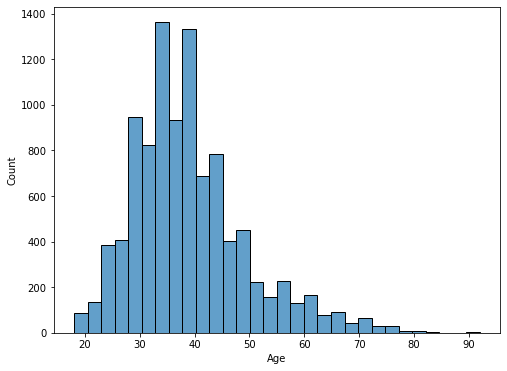

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(x="Age", data=df, bins=30,alpha=0.7)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

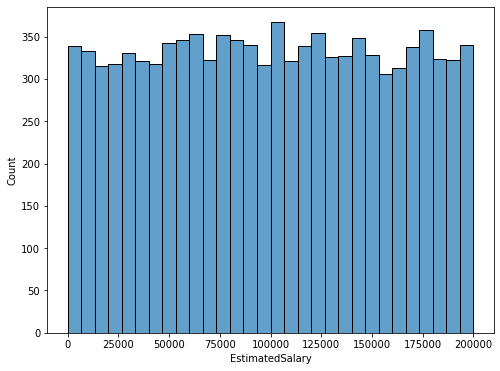

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(x="EstimatedSalary", data=df, bins=30,alpha=0.7)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

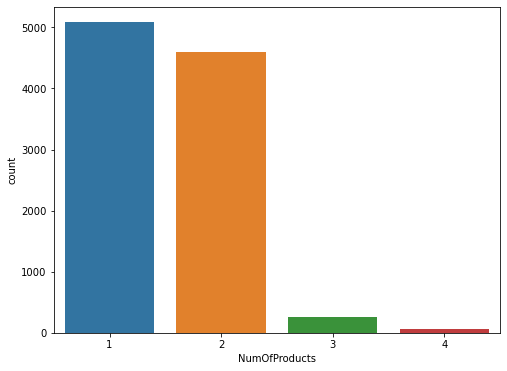

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts',data=df)

In [10]:
df1=df[df["Exited"]==0]
df2=df[df["Exited"]==1]

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']

In [13]:
df_data=df[features]

<AxesSubplot:>

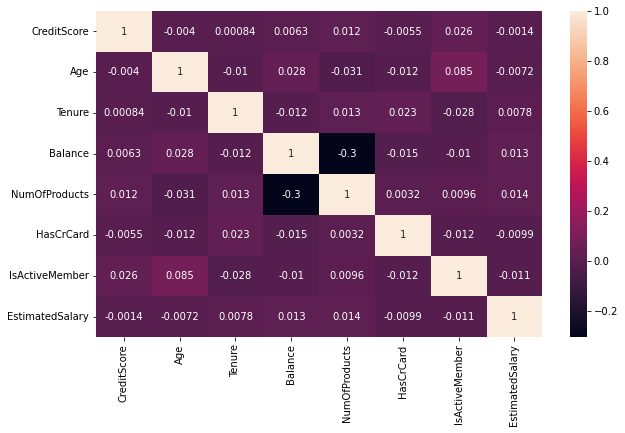

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_data.corr(), annot= True)

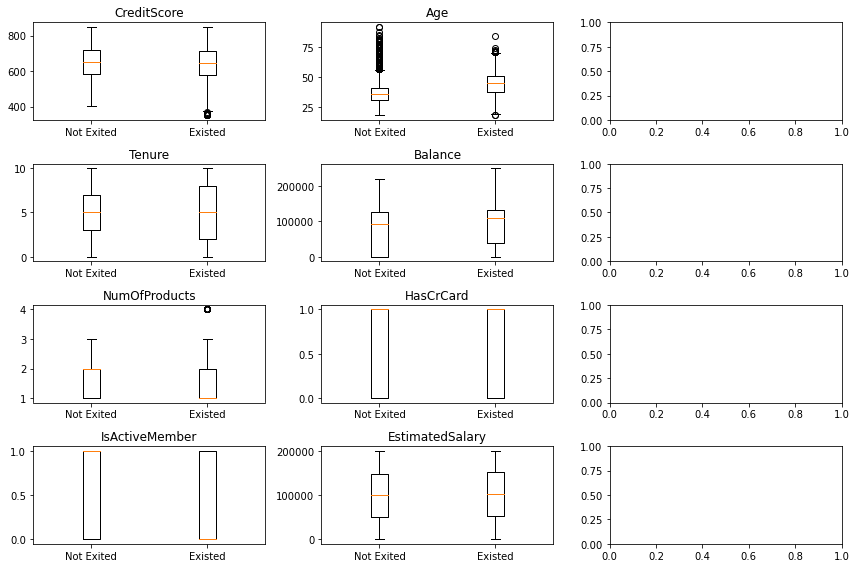

In [10]:
fig, axs= plt.subplots(4,3, figsize=(12,8))


for i in range(4):
    for j in range(2):
        k= 2*i+j
        if k>=8: continue

        feet= features[k]
        
        ax= axs[i,j]
        ax.boxplot([df1[feet], df2[feet]]);
        ax.set_title(feet)
        ax.set_xticklabels(['Not Exited', 'Existed'])
plt.subplots_adjust(wspace=.25)
plt.tight_layout()

# Feature Engineering

In [11]:
df1=pd.get_dummies(df["Geography"], prefix="Geography", drop_first=True)
df1.head()

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [12]:
df2=pd.get_dummies(df["Gender"], prefix="Gender", drop_first=True)
df2.head()

,Gender_Male
0,0
1,0
2,0
3,0
4,0


In [13]:
dff=pd.concat([df1,df2], axis=1)
dff.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [14]:
df=pd.concat([dff,df],axis=1)

In [15]:
df=df.drop(["Geography", "Gender", "RowNumber", "CustomerId", "Surname"], axis=1)

In [16]:
df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [17]:
X=df.iloc[:, 0:11]

In [18]:
y=df["Exited"]

In [19]:
X= StandardScaler().fit_transform(X)

In [20]:
X

array([[-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.57873591,  1.74273971, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57873591, -0.57380915, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.72790383, -0.57380915,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57873591, -0.57380915, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [21]:
X= pd.DataFrame(X, columns=df.columns[:-1])
X.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.578736,-0.573809,-1.095988,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.578736,1.742740,-1.095988,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.578736,-0.573809,-1.095988,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-0.578736,-0.573809,-1.095988,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-0.578736,1.742740,-1.095988,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [23]:
model1= LogisticRegression()

In [24]:
model1.fit(X_train, y_train)

LogisticRegression()

In [25]:
model1.score(X_train, y_train)

0.8097014925373134

In [26]:
l_pred= model1.predict(X_test)

In [27]:
print(confusion_matrix(y_test, l_pred))
print("\n")
print(accuracy_score(y_test, l_pred))
print("\n")
print(classification_report(y_test, l_pred))

[[2545  112]
 [ 510  133]]


0.8115151515151515


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



# KNeighborsClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
model2= KNeighborsClassifier()

In [30]:
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
model2.score(X_train, y_train)

0.8717910447761194

In [32]:
k_pred=model2.predict(X_test)

In [33]:
print(confusion_matrix(y_test, k_pred))
print("\n")
print(accuracy_score(y_test, k_pred))
print("\n")
print(classification_report(y_test, k_pred))

[[2512  145]
 [ 411  232]]


0.8315151515151515


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2657
           1       0.62      0.36      0.45       643

    accuracy                           0.83      3300
   macro avg       0.74      0.65      0.68      3300
weighted avg       0.81      0.83      0.81      3300



## Chosing the best K  value

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
error_rate = []
for i in range(1,40):
    
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train,y_train)
    K_pred = model2.predict(X_test)
    error_rate.append(np.mean(K_pred != y_test))


Text(0, 0.5, 'Error Rate')

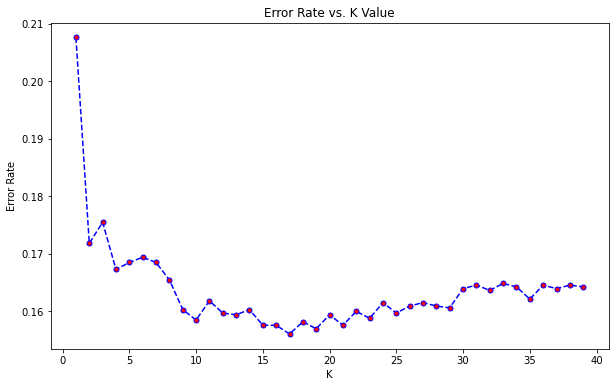

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=17
model2 = KNeighborsClassifier(n_neighbors=15)

model2.fit(X_train,y_train)
pred = model2.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,k_pred))
print("\n")
print(accuracy_score(y_test, k_pred))
print('\n')
print(classification_report(y_test,k_pred))

WITH K=17


[[2512  145]
 [ 411  232]]


0.8315151515151515


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2657
           1       0.62      0.36      0.45       643

    accuracy                           0.83      3300
   macro avg       0.74      0.65      0.68      3300
weighted avg       0.81      0.83      0.81      3300



# DecisionTreeClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
model3=DecisionTreeClassifier()

In [40]:
model3 = DecisionTreeClassifier()

model3.fit(X_train,y_train)
d_pred = model3.predict(X_test)

In [41]:
print(confusion_matrix(y_test, d_pred))
print("\n")
print(accuracy_score(y_test, d_pred))
print("\n")
print(classification_report(y_test, d_pred))

[[2284  373]
 [ 323  320]]


0.7890909090909091


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2657
           1       0.46      0.50      0.48       643

    accuracy                           0.79      3300
   macro avg       0.67      0.68      0.67      3300
weighted avg       0.80      0.79      0.79      3300



# RandomForestClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
model4=RandomForestClassifier()

In [44]:
model4 = RandomForestClassifier(n_estimators=100, max_depth=20)

model4.fit(X_train,y_train)
r_pred = model4.predict(X_test)

In [45]:
print(confusion_matrix(y_test, r_pred))
print("\n")
print(accuracy_score(y_test, r_pred))
print("\n")
print(classification_report(y_test, r_pred))

[[2556  101]
 [ 334  309]]


0.8681818181818182


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2657
           1       0.75      0.48      0.59       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300



# Support vector machine

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
model5=SVC()

In [48]:
model5 = SVC()

model5.fit(X_train,y_train)
s_pred = model5.predict(X_test)

In [49]:
print(confusion_matrix(y_test, s_pred))
print("\n")
print(accuracy_score(y_test, s_pred))
print("\n")
print(classification_report(y_test, s_pred))

[[2591   66]
 [ 388  255]]


0.8624242424242424


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2657
           1       0.79      0.40      0.53       643

    accuracy                           0.86      3300
   macro avg       0.83      0.69      0.72      3300
weighted avg       0.86      0.86      0.84      3300



# hyper parameter tunning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={"C":[1,10,100,100,1000], "gamma":[0.1,0.01,0.001,0.0001]}

In [52]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [53]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.7s
[CV] END .....................................C=1, gamma=0.1; total time=   0.8s
[CV] END .....................................C=1, gamma=0.1; total time=   0.7s
[CV] END .....................................C=1, gamma=0.1; total time=   0.7s
[CV] END .....................................C=1, gamma=0.1; total time=   0.7s
[CV] END ....................................C=1, gamma=0.01; total time=   0.7s
[CV] END ....................................C=1, gamma=0.01; total time=   0.8s
[CV] END ....................................C=1, gamma=0.01; total time=   0.7s
[CV] END ....................................C=1, gamma=0.01; total time=   0.7s
[CV] END ....................................C=1, gamma=0.01; total time=   0.7s
[CV] END ...................................C=1, gamma=0.001; total time=   0.8s
[CV] END ...................................C=1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [54]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [55]:
model5=SVC(C=1000, gamma=0.01)
model5.fit(X_train, y_train)
s_pred=model5.predict(X_test)

In [56]:
print(confusion_matrix(y_test, s_pred))
print("\n")
print(accuracy_score(y_test, s_pred))
print("\n")
print(classification_report(y_test, s_pred))

[[2573   84]
 [ 349  294]]


0.8687878787878788


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.78      0.46      0.58       643

    accuracy                           0.87      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300



# GaussianNB

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
model6= GaussianNB()

In [59]:
model6 = DecisionTreeClassifier()

model6.fit(X_train,y_train)
g_pred = model6.predict(X_test)

In [60]:
print(confusion_matrix(y_test, g_pred))
print("\n")
print(accuracy_score(y_test, g_pred))
print("\n")
print(classification_report(y_test, g_pred))

[[2264  393]
 [ 332  311]]


0.7803030303030303


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2657
           1       0.44      0.48      0.46       643

    accuracy                           0.78      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.79      0.78      0.78      3300



# Neuro Network

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train= StandardScaler().fit_transform(X_train)

In [63]:
X_test= StandardScaler().fit_transform(X_test)

In [64]:
model=Sequential()

In [65]:
model.add(Dense(11, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [66]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [67]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=30,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [68]:
model_history=model.fit(X_train, y_train,epochs=1000,validation_split=0.33,callbacks=early_stop)

Epoch 1/1000
147/147 [==============================] - 3s 5ms/step - loss: 0.5899 - accuracy: 0.7326 - val_loss: 0.5312 - val_accuracy: 0.7893
Epoch 2/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7940 - val_loss: 0.4877 - val_accuracy: 0.7893
Epoch 3/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7940 - val_loss: 0.4617 - val_accuracy: 0.7893
Epoch 4/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7944 - val_loss: 0.4461 - val_accuracy: 0.7901
Epoch 5/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7957 - val_loss: 0.4370 - val_accuracy: 0.7953
Epoch 6/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8008 - val_loss: 0.4272 - val_accuracy: 0.7979
Epoch 7/1000
147/147 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8061 - val_loss: 0.4161 - val_accuracy:

In [69]:
model.evaluate(X_train, y_train)

219/219 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8603


[0.3349321782588959, 0.8602856993675232]

In [70]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [71]:
loss=pd.DataFrame(model_history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.589872,0.732566,0.531224,0.789269
1,0.500052,0.793986,0.487695,0.789269
2,0.468417,0.793986,0.461697,0.789269
3,0.447961,0.794412,0.446058,0.790134
4,0.434273,0.795692,0.436964,0.795327


<AxesSubplot:>

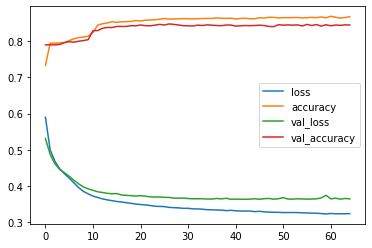

In [72]:
loss.plot()

In [73]:
y_pred=model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [74]:
y_pred=(y_pred>=0.5)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
print(confusion_matrix(y_test, y_pred))

[[2299  117]
 [ 307  277]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.70      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

